In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [4]:
df=pd.read_csv('Automobile_insurance_fraud.csv')


In [6]:
pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [8]:
df.shape

(1000, 40)

In [9]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
df.apply(lambda x: len(x.unique()))

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

_c39 has missing values in all the rows hence we will drop it.

In [11]:
df.drop('_c39',axis=1,inplace=True)

months_as_customer, age, policy_number, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, capital-gains, capital-loss, incident_hour_of_the_day, number_of_vehicles_involved, number_of_vehicles_involved, bodily_injuries, witnesses, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_year are all int or float data types.

In [21]:
#separating categorical and continuous data
cat_cols=[col for col in df.columns if df[col].dtype==object]
cat_cols

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [19]:
#continuous columns
cont_cols=[col for col in df.columns if df[col].dtype!=object]
cont_cols

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [23]:
df[cat_cols].head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [24]:
df[cont_cols].head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [25]:
df[cont_cols].describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


<B>From above table,
    
<ul>1.Count for all the columns is 1000, hence there are no missing values in these columns.<br>
    2.The mean of months_as_customer is 203.95 and the mode is 199.50. The range is 0 - 479 and IQR is 115.75 - 276.25.<br>
    3.The mean of age is 38.95 and the mode is 38. The range of age is 19 - 64 and IQR is 32 - 44.<br>
    4.The mean of policy_deductable is 1136 and the mode is 1000. The range of policy_deductable is 500 - 2000 and IQR is also 500 - 2000.<br>
    5.Mode of umbrella_limit is 0 and range is -1000000 - 1000000.<br>
    6.The mean of capital-gains is 25126.10 and the mode is 0. The range is 0 - 100500.<br>
    7.The mean of capital-loss is -26793.70 and the mode is -23250.00. The range is -111100.00 - 0.<br>
    8.The mode of incident_hour of the day is 12.<br>
    9.The mean of total_claim_amount is 52761.94 and the mode is 58055.00. The range is 100 - 114920.00 and IQR is 41812.50 - 70592.50.<br>
    10.The mean of injury_claims is 7433.42 and the mode is 6775.00. The range is 0 - 21450 and IQR is 4295.00 - 11305.00.<br>
    11.The mean of property_claim is 7399.57 and the mode is 6750.00. The range is 0 - 23670.00 and IQR is 4445.00 - 10885.00.<br>
    12.The mean of vehicle_claim is 37928.95 and the mode is 42100.00. The range is 70 - 79560.00 and IQR is 30292.50 - 50822.50.<br>
    13.The mode of auto_year is 2005 and the range is 1995 - 2015.<br>
    14.The mean of policy_annual_premium is 1256.41 and the mode is 1257.20. The range is 433.33 - 2047.59 and IQR is 1089.61 - 1415.69.</ul>


In [28]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

No null values present in dataset.

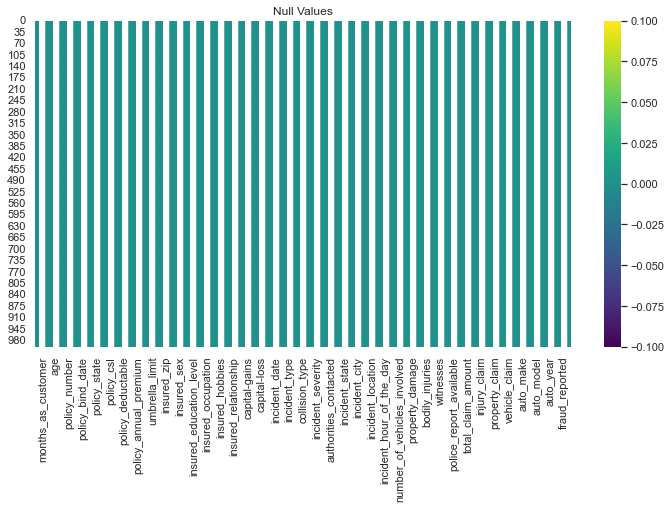

In [31]:
plt.figure(figsize = [12, 6])
sns.heatmap(df.isnull(), annot = True,cmap='viridis')       #Visual representation of no null values present in dataset
plt.title('Null Values')
plt.show()


## EDA

<b>Univariate Analysis

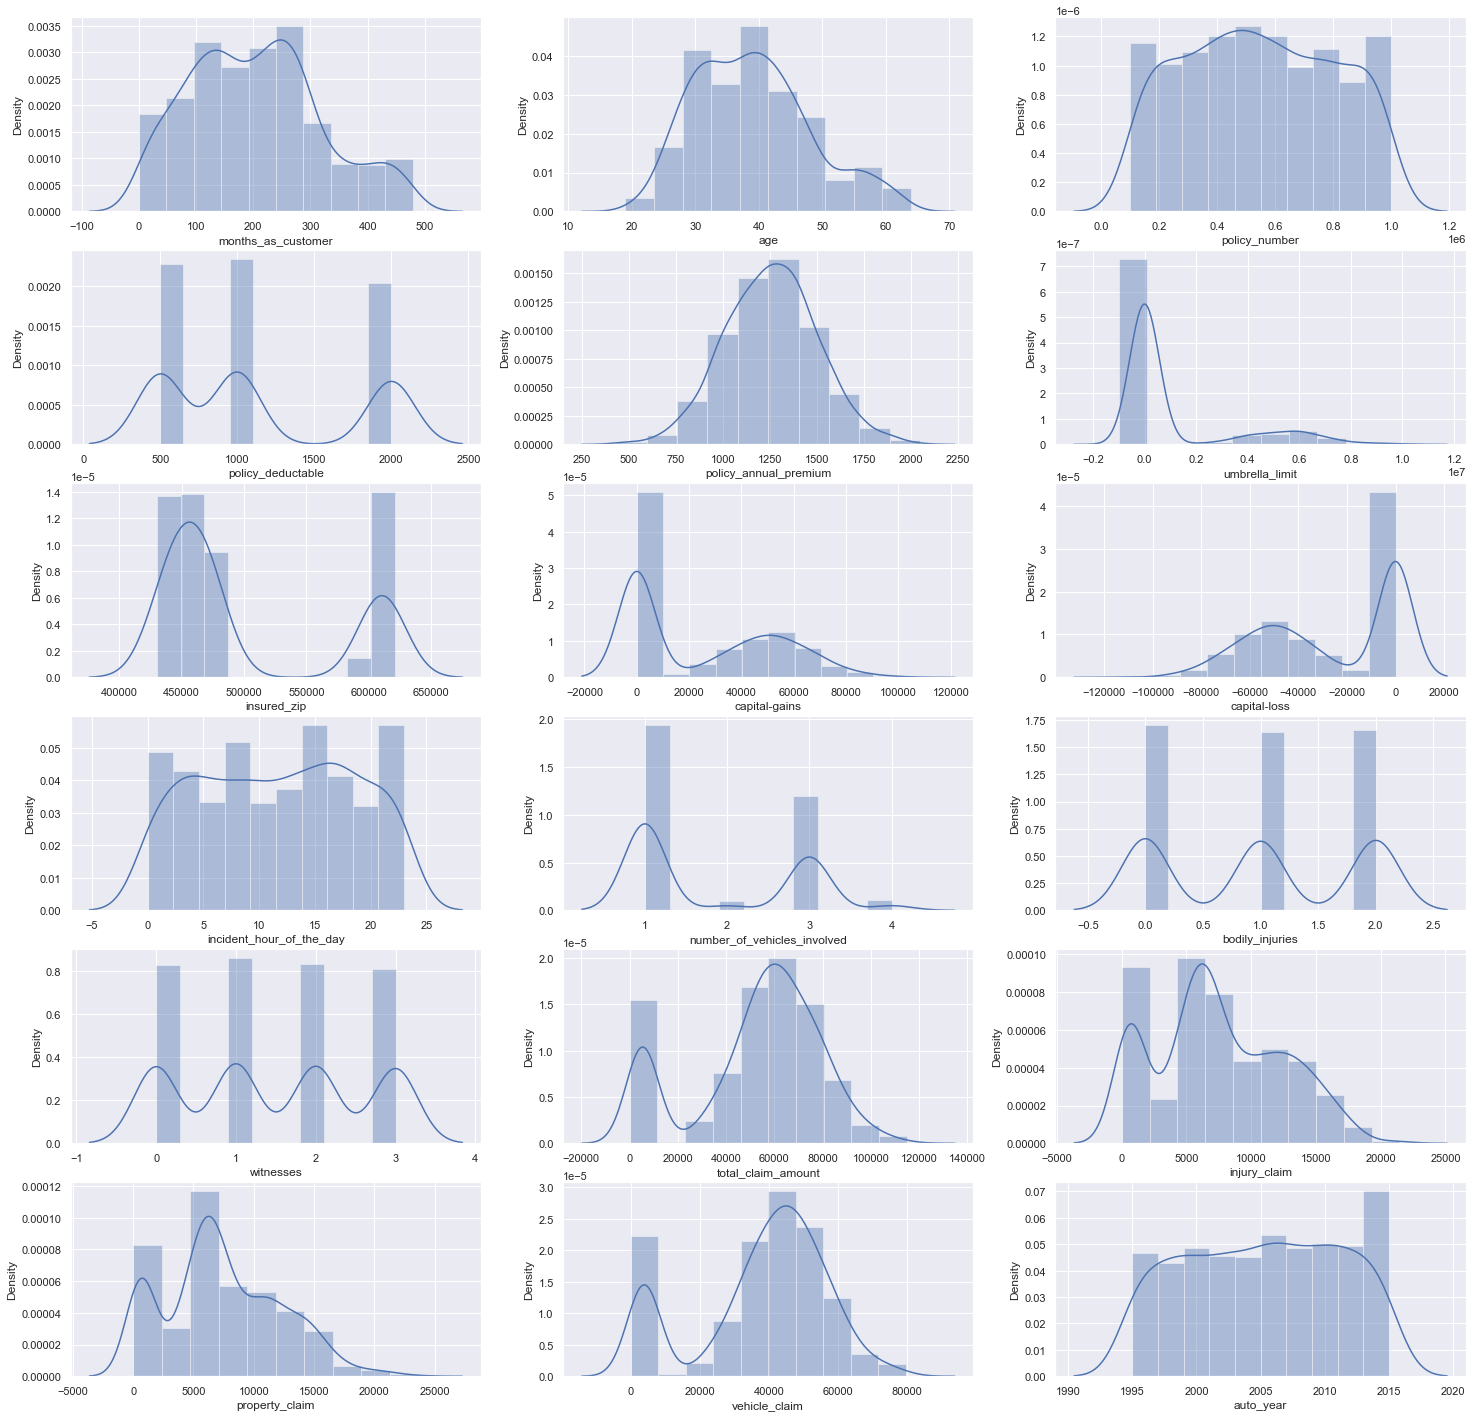

In [38]:
plt.figure(figsize=(25,25))
n=1
for i in cont_cols:
    ax=plt.subplot(6,3,n)
    sns.distplot(df[i],bins=10,ax=ax)
    plt.xlabel(i,fontsize=12)
    n+=1
plt.show()

A lot of the graphs are almost perfectly bell shaped like policy_annual_premium, vehicle_claim, total_claim_amount, etc.

There are some categorical data too in these columns, like number of vehicles involved, bodily injuries, witnesses, etc.

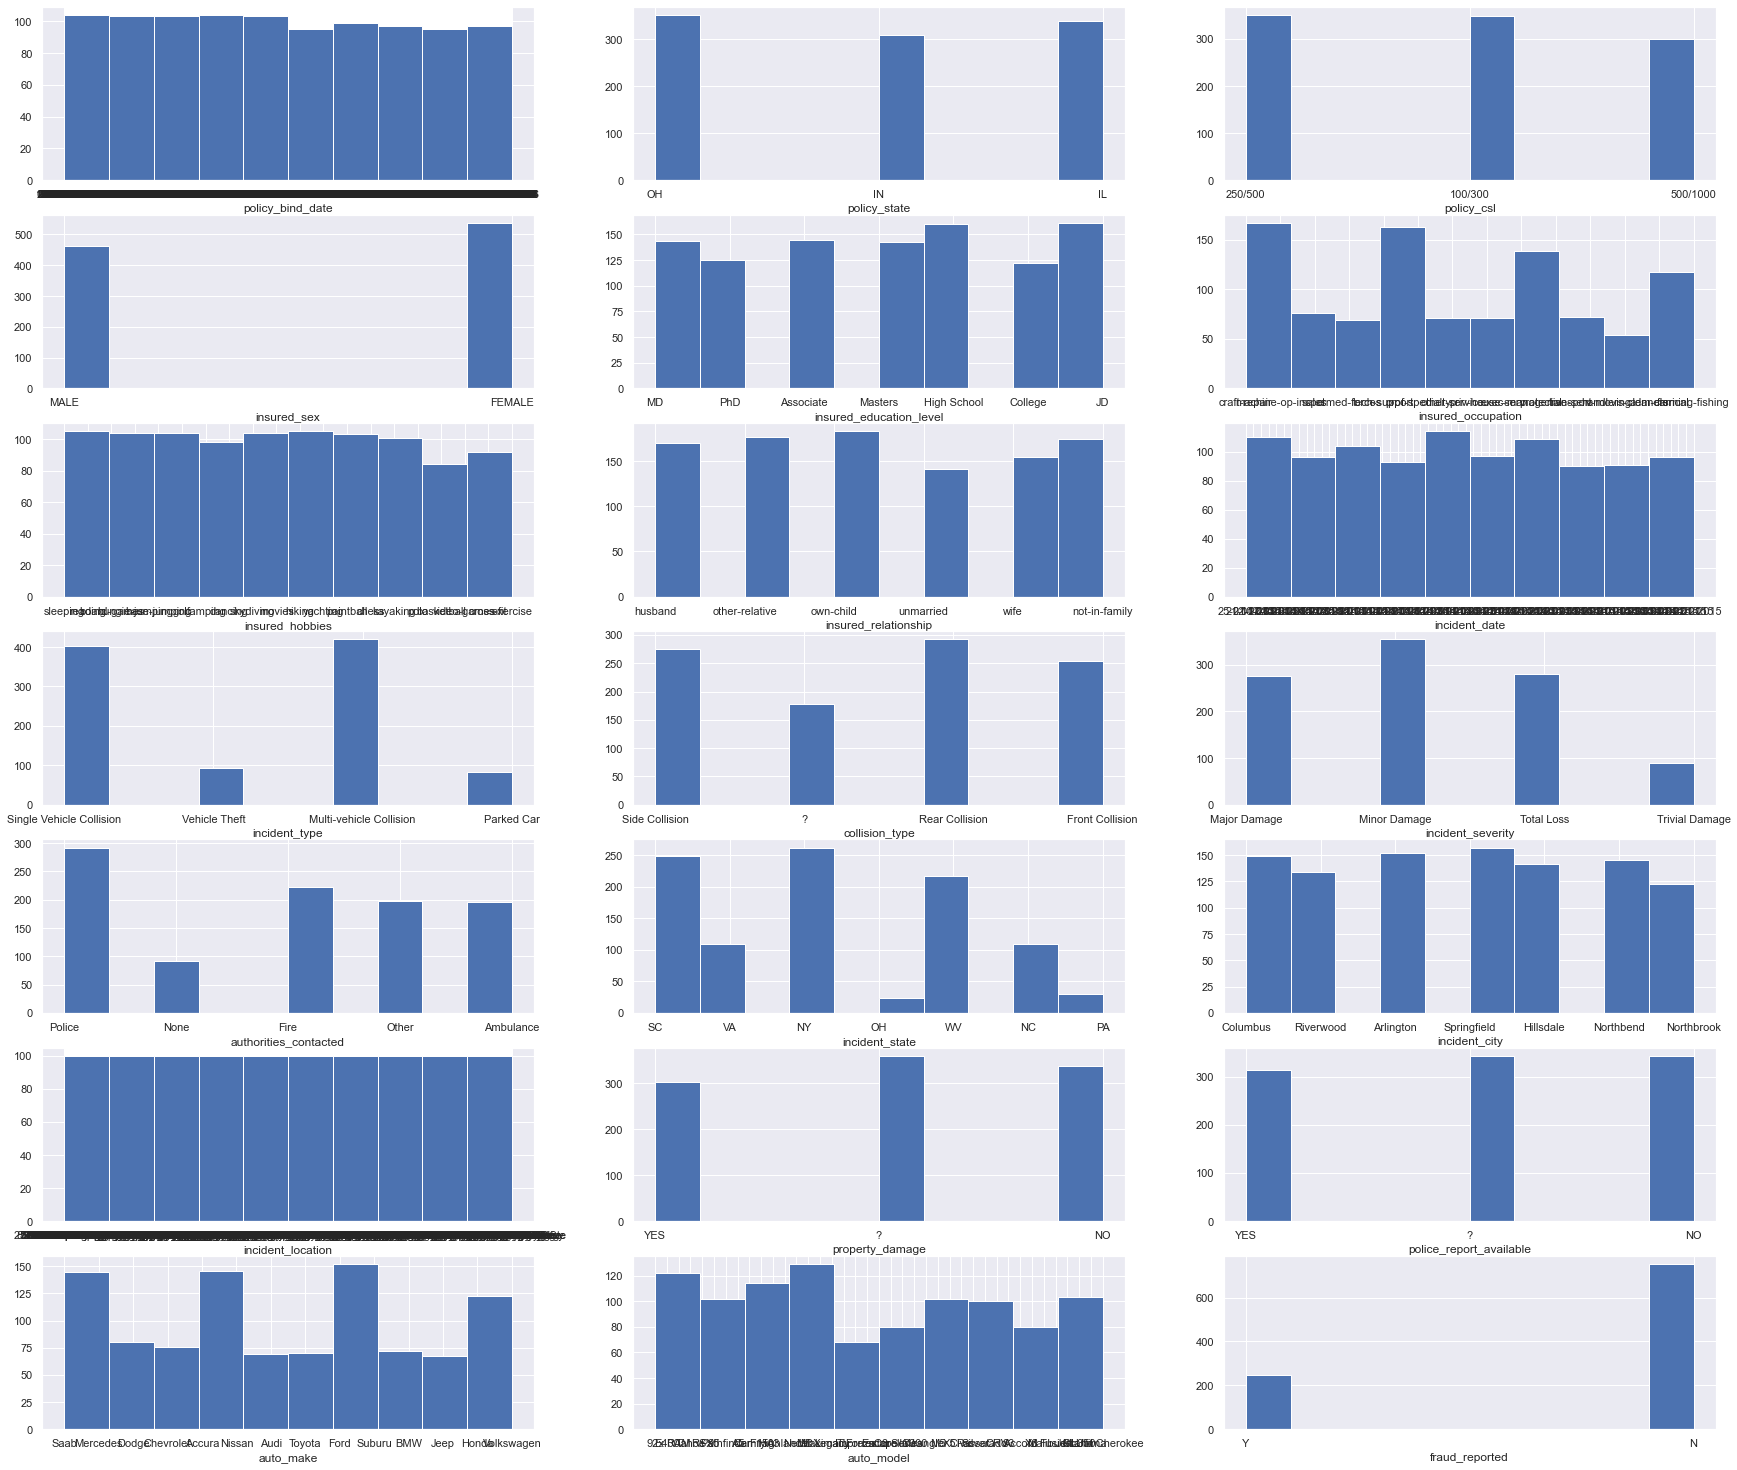

In [39]:
plt.figure(figsize=(30,30))
n=1
for i in cat_cols:
    ax=plt.subplot(8,3,n)
    df[i].hist(grid=True)
    plt.xlabel(i,fontsize=12)
    n+=1
plt.show()

In [40]:
df.drop(['policy_bind_date', 'incident_date', 'incident_location'],axis=1,inplace=True)

In [42]:
cat_cols.remove('policy_bind_date')
cat_cols.remove('incident_date')
cat_cols.remove('incident_location')

Dropped 'policy_bind_date', 'incident_date', 'incident_location' because they didn't give us much information about.

In [43]:
df[cat_cols].head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


Some of the categorical columns have '?' as value.Replacing '?' with 'Unknown'.

In [44]:
df['collision_type'].replace('?', 'Unknown', inplace = True)
df['property_damage'].replace('?', 'Unknown', inplace = True)
df['police_report_available'].replace('?', 'Unknown', inplace = True)

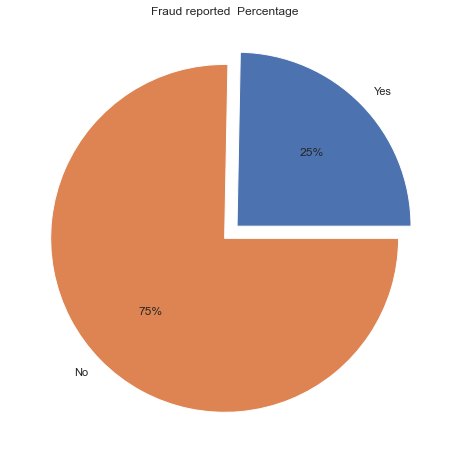

In [48]:
vals = [df.fraud_reported[df.fraud_reported == 'Y'].count() , df.fraud_reported[df.fraud_reported == 'N'].count()]
plt.figure(figsize = (15, 8))
label = ["Yes" , "No"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0.1 , 0))
plt.title("Fraud reported  Percentage")
plt.show()

Only 25% of the claims are fraud while 75% are not fraud.

<b>Bivariate Analysis

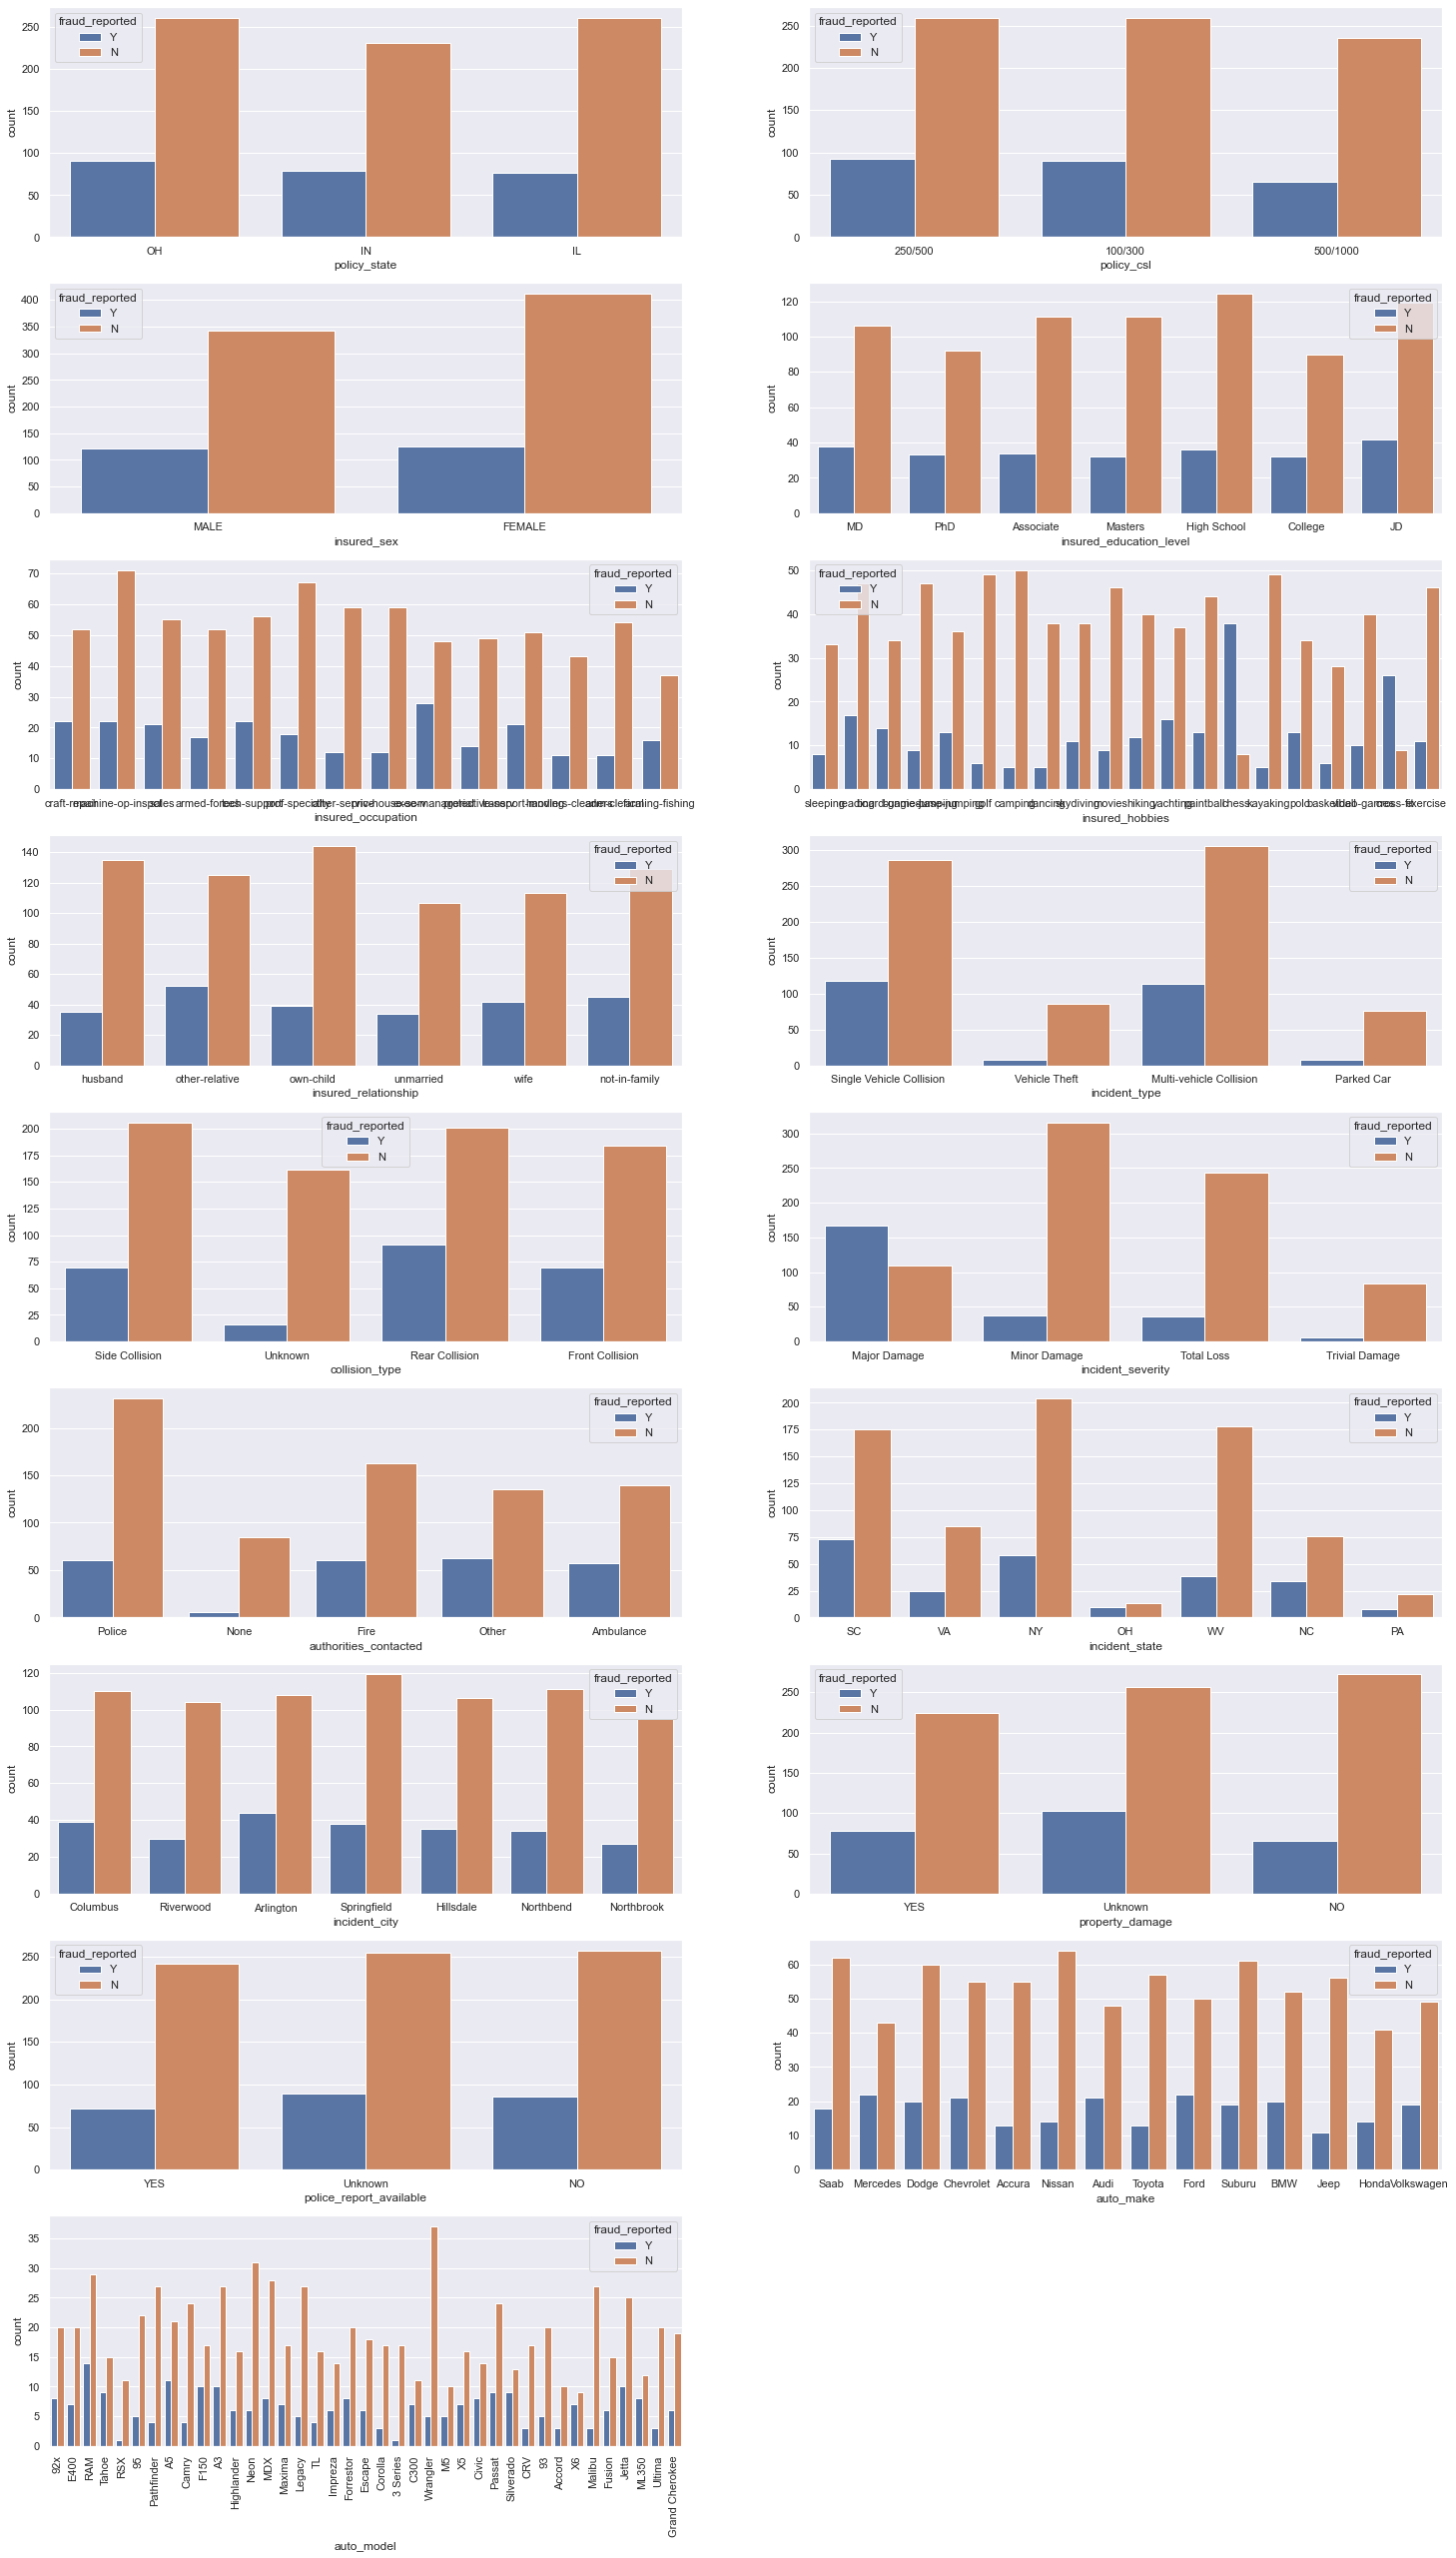

In [58]:
plt.figure(figsize=(25,50))
n=1
for i in cat_cols[:-1]: 
    ax=plt.subplot(10,2,n)                           
    sns.countplot(df[i],hue=df['fraud_reported'],ax=ax)
    n+=1
plt.xticks(rotation=90)
plt.show()

In incident severity we can see that fraud is reported in alot of major damage cases. Apart from that other columns and bars have low fraud reported rate

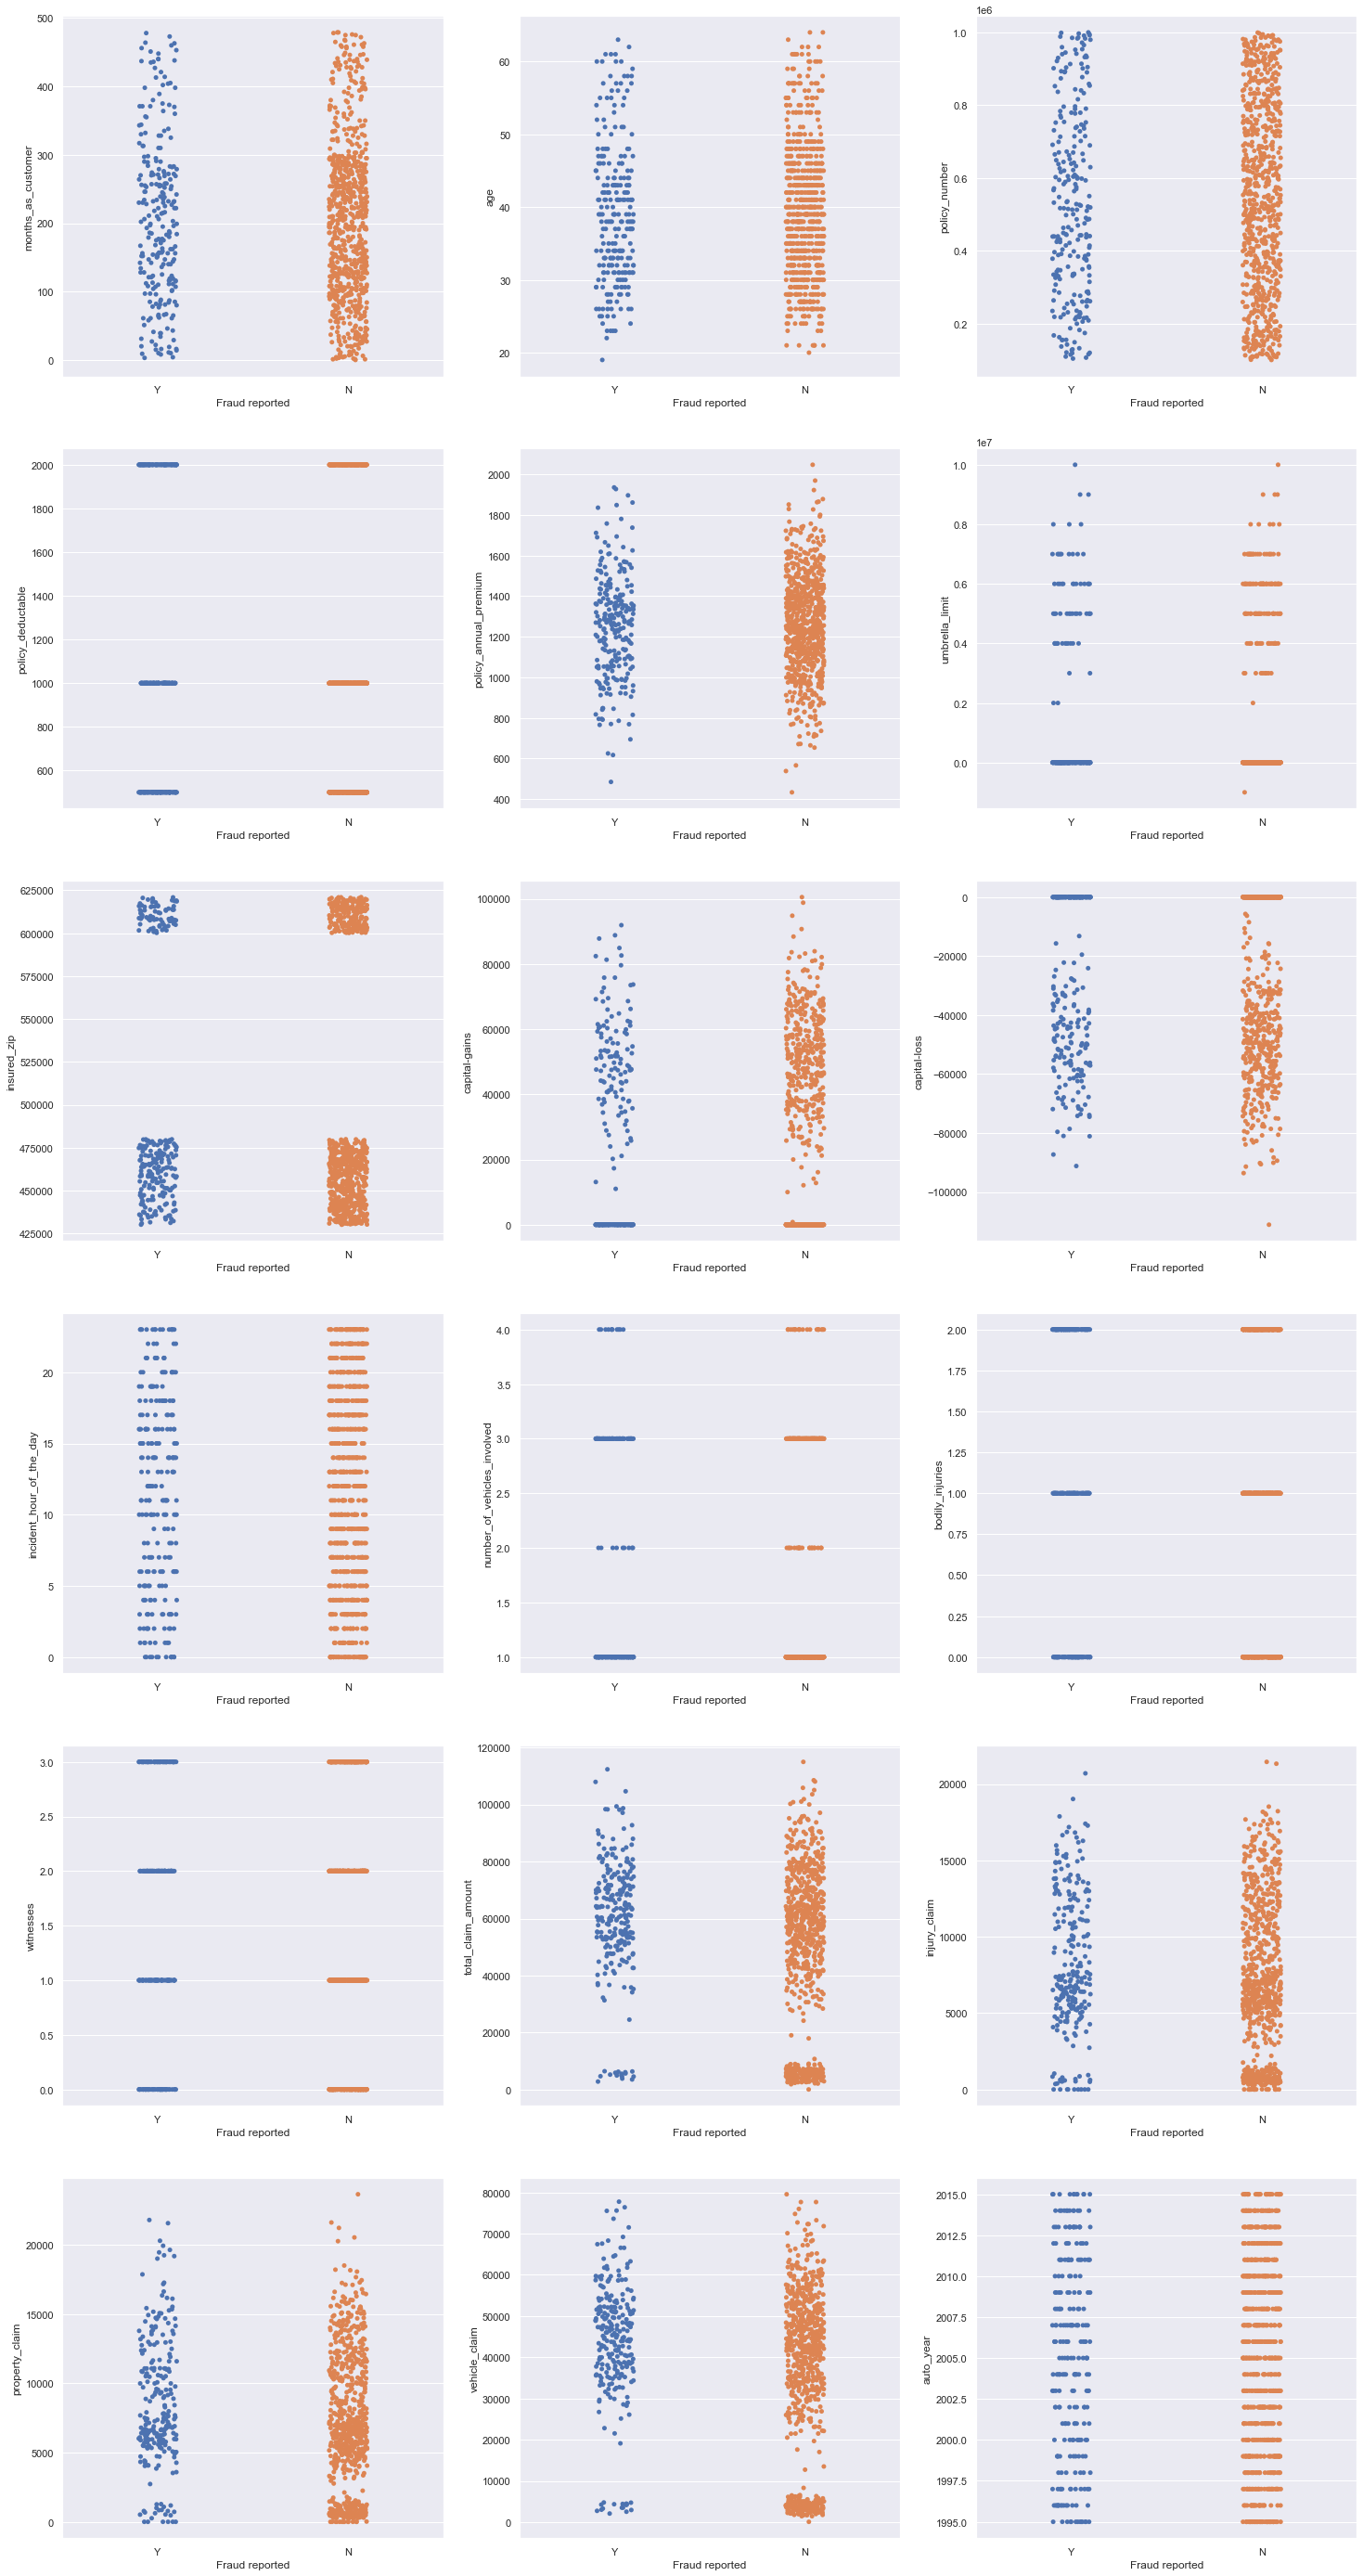

In [63]:
plt.figure(figsize=(25,50))
n=1
for i in cont_cols:
    ax=plt.subplot(6,3,n)
    fig=sns.stripplot(df['fraud_reported'],df[i],ax=ax)
    fig.set(xlabel='Fraud reported',ylabel=i)
    n+=1
plt.show()

In [64]:
df['fraud_reported'].replace('N', 0, inplace = True)
df['fraud_reported'].replace('Y', 1, inplace = True)

<b>Correlation Matrix

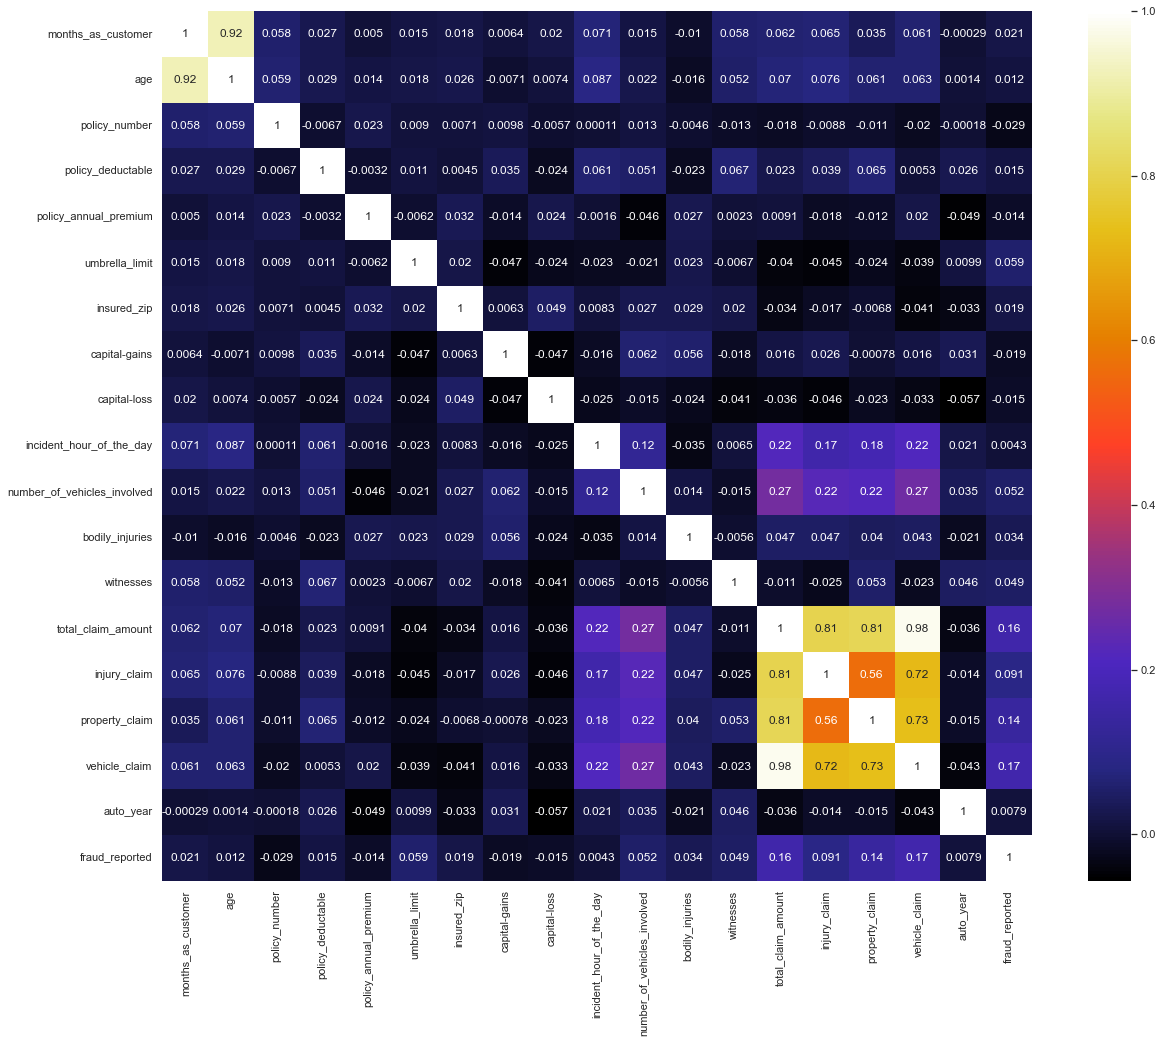

In [75]:
corr=df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,square=True,cmap='CMRmap')
plt.show()

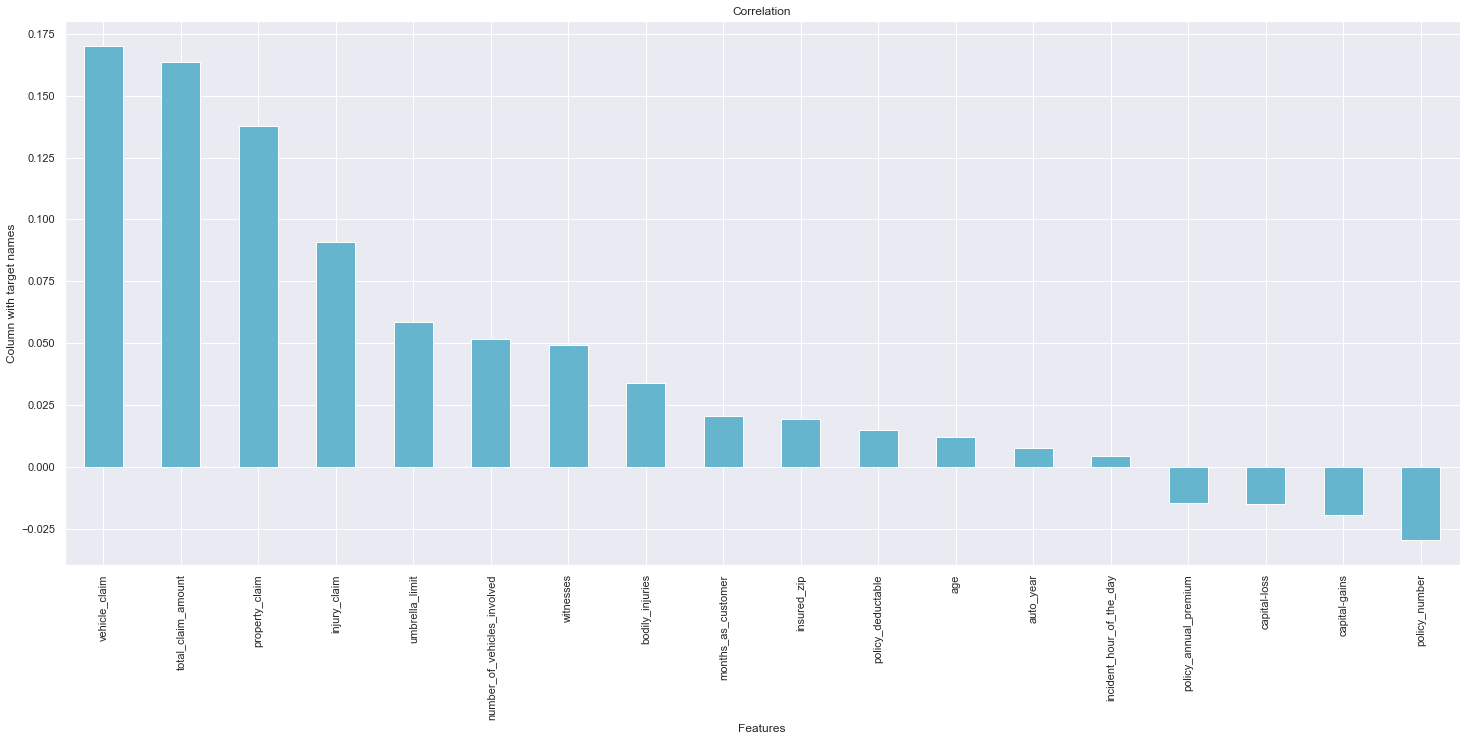

In [76]:
plt.figure(figsize = (25, 10))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Fraud reported is highly correlated with vehicle_claim then total_claim_amount and then property_claim with correlation of 0.17, 0.16, 0.14 respectively.

<b>Outliers and Skewness

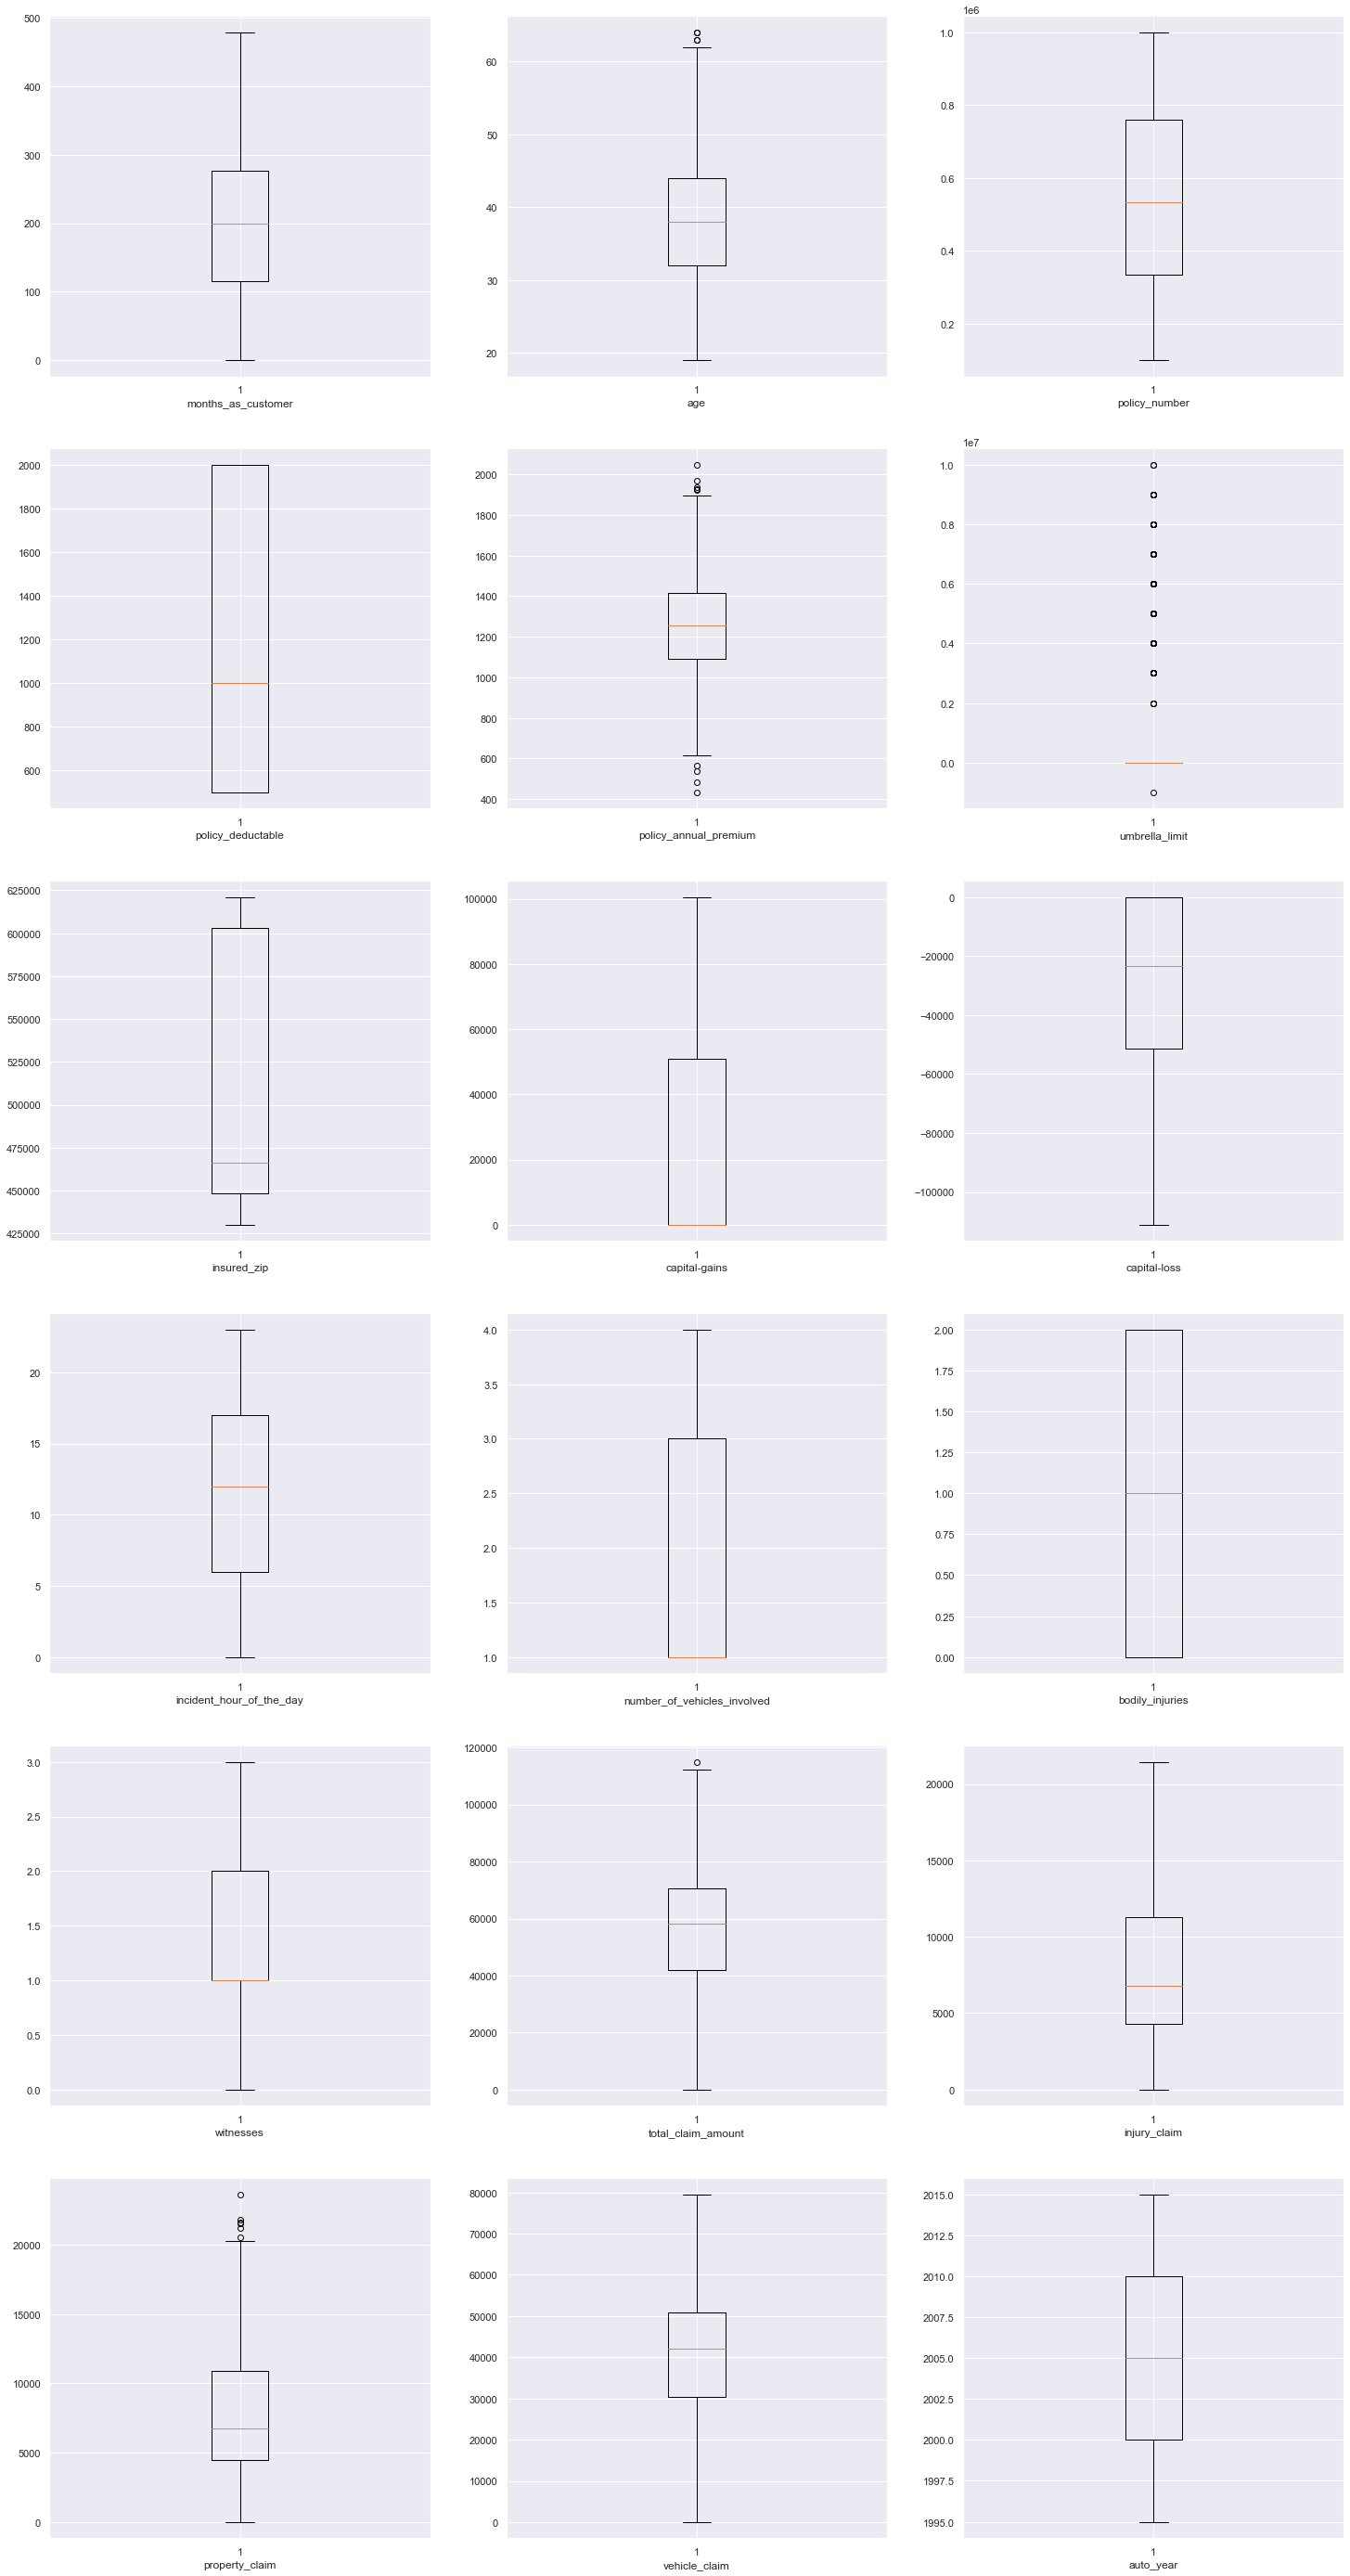

In [88]:
plt.figure(figsize=(25,50))
n=1
for i in cont_cols:
    ax=plt.subplot(6,3,n)
    plt.boxplot(df[i])
    plt.xlabel(i)
    n+=1
plt.show()

There are some outlliers present,but are acceptable.No need for outlier treatment.

In [89]:
df[cont_cols].skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

No need for trearment of skewness.

In [91]:
#Encoding categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for col in cat_cols:
    df[col]=enc.fit_transform(df[col])

In [92]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,3,1,4,5,5,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,3,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


### Model Building

In [121]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve

In [94]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

<b>Best Random State

In [95]:
lr=LogisticRegression()
maxAccu=0
bestRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best random state is {} with accuracy {}'.format(bestRS,maxAccu))

Best random state is 16 with accuracy 0.81


In [96]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=16)

In [109]:
ac=[]
cv=[]

### Logistic Regression

Training accuracy 73.1%
Accuracy score 81%
Classification report               precision    recall  f1-score   support

           0       0.81      1.00      0.89       242
           1       1.00      0.02      0.03        58

    accuracy                           0.81       300
   macro avg       0.90      0.51      0.46       300
weighted avg       0.85      0.81      0.73       300

CV score 0.751


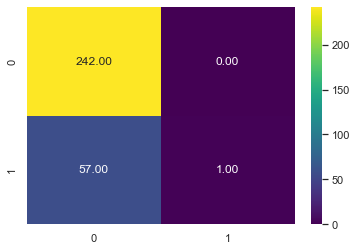

In [110]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
accu=accuracy_score(y_test,pred_lr)

#accuracy
print('Training accuracy {}%'.format(round(lr.score(x_train,y_train),3)*100))
print('Accuracy score {}%'.format(round(accu*100),3))
ac.append(accu)

#classification report
print('Classification report',classification_report(y_test,pred_lr))

#confusion matrix
cm=confusion_matrix(y_test,pred_lr)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis')

#cross validation
cv_=cross_val_score(lr,x,y,cv=5).mean()
print('CV score',cv_)
cv.append(cv_)

### Decision Tree Classifier

Training accuracy 100.0%
Accuracy score 78%
Classification report               precision    recall  f1-score   support

           0       0.88      0.83      0.86       242
           1       0.44      0.53      0.48        58

    accuracy                           0.78       300
   macro avg       0.66      0.68      0.67       300
weighted avg       0.80      0.78      0.78       300

CV score 0.789


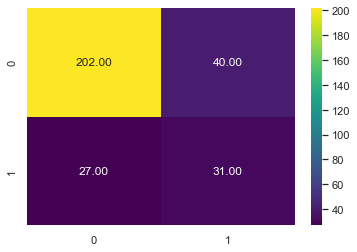

In [111]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
accu=accuracy_score(y_test,pred_dt)

#accuracy
print('Training accuracy {}%'.format(round(dt.score(x_train,y_train),3)*100))
print('Accuracy score {}%'.format(round(accu*100),3))
ac.append(accu)

#classification report
print('Classification report',classification_report(y_test,pred_dt))

#confusion matrix
cm=confusion_matrix(y_test,pred_dt)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis')

#cross validation
cv_=cross_val_score(dt,x,y,cv=5).mean()
print('CV score',cv_)
cv.append(cv_)

### Random Forest Classifier

Training accuracy 100.0%
Accuracy score 80.33333333333333%
Classification report               precision    recall  f1-score   support

           0       0.86      0.90      0.88       242
           1       0.49      0.38      0.43        58

    accuracy                           0.80       300
   macro avg       0.67      0.64      0.65       300
weighted avg       0.79      0.80      0.79       300

CV score 0.7779999999999999


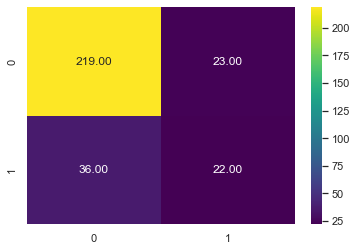

In [114]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
accu=accuracy_score(y_test,pred_rf)

#accuracy
print('Training accuracy {}%'.format(round(rf.score(x_train,y_train),3)*100))
print('Accuracy score {}%'.format(accu*100))
ac.append(accu)

#classification report
print('Classification report',classification_report(y_test,pred_rf))

#confusion matrix
cm=confusion_matrix(y_test,pred_rf)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis')

#cross validation
cv_=cross_val_score(rf,x,y,cv=5).mean()
print('CV score',cv_)
cv.append(cv_)

### KNeighbors Classifier

Training accuracy 78.10000000000001%
Accuracy score 73.66666666666667%
Classification report               precision    recall  f1-score   support

           0       0.81      0.88      0.84       242
           1       0.23      0.16      0.19        58

    accuracy                           0.74       300
   macro avg       0.52      0.52      0.51       300
weighted avg       0.70      0.74      0.72       300

CV score 0.704


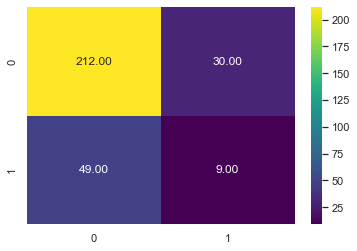

In [115]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
accu=accuracy_score(y_test,pred_knn)

#accuracy
print('Training accuracy {}%'.format(round(knn.score(x_train,y_train),3)*100))
print('Accuracy score {}%'.format(accu*100))
ac.append(accu)

#classification report
print('Classification report',classification_report(y_test,pred_knn))

#confusion matrix
cm=confusion_matrix(y_test,pred_knn)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis')

#cross validation
cv_=cross_val_score(knn,x,y,cv=5).mean()
print('CV score',cv_)
cv.append(cv_)

### Support Vector Classfier

Training accuracy 73.0%
Accuracy score 81%
Classification report               precision    recall  f1-score   support

           0       0.81      1.00      0.89       242
           1       0.00      0.00      0.00        58

    accuracy                           0.81       300
   macro avg       0.40      0.50      0.45       300
weighted avg       0.65      0.81      0.72       300

CV score 0.7529999999999999


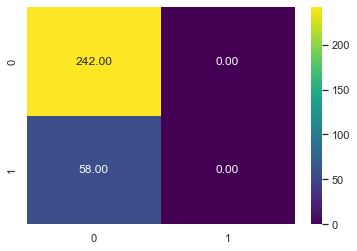

In [116]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
accu=accuracy_score(y_test,pred_svc)

#accuracy
print('Training accuracy {}%'.format(round(svc.score(x_train,y_train),3)*100))
print('Accuracy score {}%'.format(round(accu*100),3))
ac.append(accu)

#classification report
print('Classification report',classification_report(y_test,pred_svc))

#confusion matrix
cm=confusion_matrix(y_test,pred_svc)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis')

#cross validation
cv_=cross_val_score(svc,x,y,cv=5).mean()
print('CV score',cv_)
cv.append(cv_)

### Cross Valiadation

In [117]:
model=[lr,dt,rf,knn,svc]
classification=pd.DataFrame({'Model':model})
classification['Accuracy']=ac
classification['CV score']=cv
classification['Difference']=[ac[0]-cv[0],ac[1]-cv[1],ac[2]-cv[2],ac[3]-cv[3],ac[4]-cv[4]]
classification.sort_values(by='Difference')

,Model,Accuracy,CV score,Difference
1,DecisionTreeClassifier(),0.776667,0.789,-0.012333
2,"(DecisionTreeClassifier(max_features='auto', r...",0.803333,0.778,0.025333
3,KNeighborsClassifier(),0.736667,0.704,0.032667
4,SVC(),0.806667,0.753,0.053667
0,LogisticRegression(),0.810000,0.751,0.059000


Difference between accuracy score and cv score is least in Decision Tree Classifier.

## Hyper Parameter Tuning

In [118]:
parameters={'criterion':['gini','entropy'],
            'max_depth':np.arange(3,16)}

GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [119]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])})

In [120]:
GCV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [123]:
final_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print('Final Accuracy',accuracy_score(y_test,pred))

Final Accuracy 0.8466666666666667


After hypertuning with gridsearchcv our decision tree model's accuracy increased from 0.81 to 0.84

<B>Saving The model

In [124]:
import joblib
joblib.dump(final_model,'Insurance Fraud.pkl')

['Insurance Fraud.pkl']

### Predicted results from saved model

In [125]:
loaded_model=joblib.load('Insurance Fraud.pkl')
result=loaded_model.score(x_test,y_test)
print(result)

0.8466666666666667


In [126]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:], pred[:]], index = ['Predicted', 'Original'])

In [127]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Predicted,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0
Original,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0
